In [1]:
# tutorial is based on https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

import pandas as pd

data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]

bankdata = pd.read_csv(data_link, names=col_names, sep=",", header=None)
bankdata.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
bankdata['class'].unique()

array([0, 1])

In [3]:
bankdata['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [4]:
bankdata['class'].value_counts(normalize=True)

class
0    0.555394
1    0.444606
Name: proportion, dtype: float64

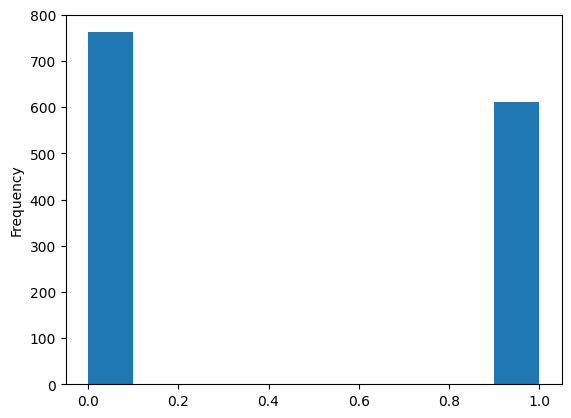

In [5]:
bankdata['class'].plot.hist();

In [6]:
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [7]:
# predictors vs class
y = bankdata['class']
X = bankdata.drop('class', axis=1) # axis=1 means dropping from the column axis

In [8]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [9]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 1097 samples for training and 275 samples for testing.


In [14]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid',verbose=1,gamma='auto') # auto means, gamma = 1/nfeatures

In [15]:
svc.fit(X_train, y_train)

[LibSVM]*
optimization finished, #iter = 281
obj = -5653.726142, rho = 9.460241
nSV = 461, nBSV = 459
Total nSV = 461


SVC(gamma='auto', kernel='sigmoid', verbose=1)

In [16]:
y_pred = svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.57      0.57      0.57       148
           1       0.50      0.49      0.49       127

    accuracy                           0.53       275
   macro avg       0.53      0.53      0.53       275
weighted avg       0.53      0.53      0.53       275



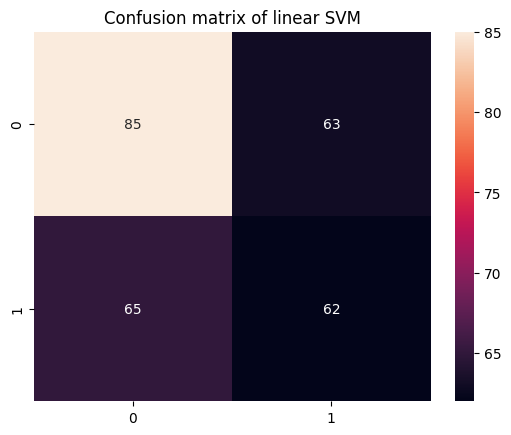

In [17]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       614
           1       0.55      0.54      0.54       483

    accuracy                           0.60      1097
   macro avg       0.59      0.59      0.59      1097
weighted avg       0.60      0.60      0.60      1097



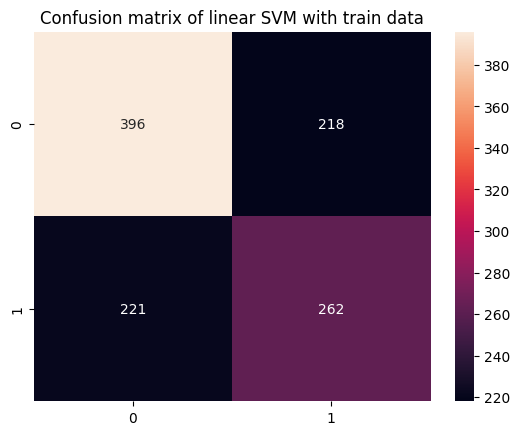

In [18]:
y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))

In [19]:
svc.get_params()
print(svc.n_support_)

[230 231]


In [20]:
# get the actual output of SVM
decision_function = svc.decision_function(X_test)

In [21]:
print(decision_function)

[-3.50713076e+01  1.76062006e+01  8.95404661e+00 -8.06317802e+01
  1.74972796e+01  9.01669557e+00 -5.65539847e+01 -1.83207679e+02
 -2.93124616e+02 -8.69208069e+01 -2.91475310e+01  1.44875632e+01
  2.19694497e+01 -3.60066838e+00  1.56846701e+02  1.57100224e+01
  3.26702101e+01  5.68846972e+01 -4.96065348e+00  2.37432599e+01
  1.48635432e+01 -1.21951445e+02  3.27938298e+00  1.76980091e+01
 -6.33959767e+01 -2.18525893e+01 -5.34170243e+01 -2.89241564e+00
  1.57468453e+01 -1.06492997e+00  1.54290966e+01 -1.39640839e+02
  7.75076424e+00 -4.18347604e+01 -3.25225554e+01  8.02084433e+00
 -2.36208272e+01  1.31101836e+01  1.14386173e+01 -2.16669162e+02
  1.98275353e+01  1.50865476e+01  6.47611201e+00  1.53285436e+01
  3.13650855e+02 -4.34287109e+00  4.17580366e+01  7.55650615e-01
 -3.82651268e+00  1.74585522e+01  9.18130651e+00 -2.31239148e+02
 -4.70936741e+01  3.82798047e+00 -5.69288574e+01  1.00121590e+01
 -4.29774171e+01 -1.65360914e+00  1.31865129e+00  1.43601127e+01
 -3.07604378e-01 -2.95971

In [24]:
import numpy as np
print("svc.gamma: ", svc.gamma)
print("svc.degree: ", svc.degree)

sv=open("../data-kernel-model-sigmoid/support_vectors_sigmoid.txt","w")
dual_coeff=open("../data-kernel-model-sigmoid/dual_coeff_sigmoid.txt","w")
intercept=open("../data-kernel-model-sigmoid/intercept_sigmoid.txt","w")
xtestSample="../data-kernel-model-sigmoid/xtest_sigmoid.txt"
ytestSample="../data-kernel-model-sigmoid/ytest_sigmoid.txt"
ytestClassificationScore="../data-kernel-model-sigmoid/yclassificationscore.txt"

np.savetxt(sv,svc.support_vectors_)
    
np.savetxt(dual_coeff,svc.dual_coef_,delimiter=' ')
np.savetxt(intercept,svc.intercept_,delimiter=' ')

with open(xtestSample, "w") as f1:
    for item in X_test.head(1).iloc[0].values:
        f1.write(str(item) + " ")
        
np.savetxt(ytestSample,y_test.head(1), delimiter=' ')
with open(ytestClassificationScore, "w") as f2:
    f2.write(str(decision_function[0]))
    
sv.close()
dual_coeff.close()
intercept.close()
f1.close()
f2.close()

svc.gamma:  auto
svc.degree:  3
